In [3]:
from  create_dataset import *
from global_variables import *
import cv2 as cv
from tqdm import tqdm
import random
import os


In [11]:
### read unknown_faces
unknown_faces = []
dir_path = os.path.join("..", "data", "unknown_faces")
files = os.listdir(dir_path)
for f in files:
    file_path = os.path.join(dir_path, f)  
    face = cv.imread(file_path)  
    unknown_faces.append(face)


### read known_faces
known_faces = []
dir_path = os.path.join("..", "data", "known_faces")
files = os.listdir(dir_path)
for f in files:
    file_path = os.path.join(dir_path, f)  
    face = cv.imread(file_path)  
    known_faces.append(face)

positive_exemples_face = unknown_faces + known_faces


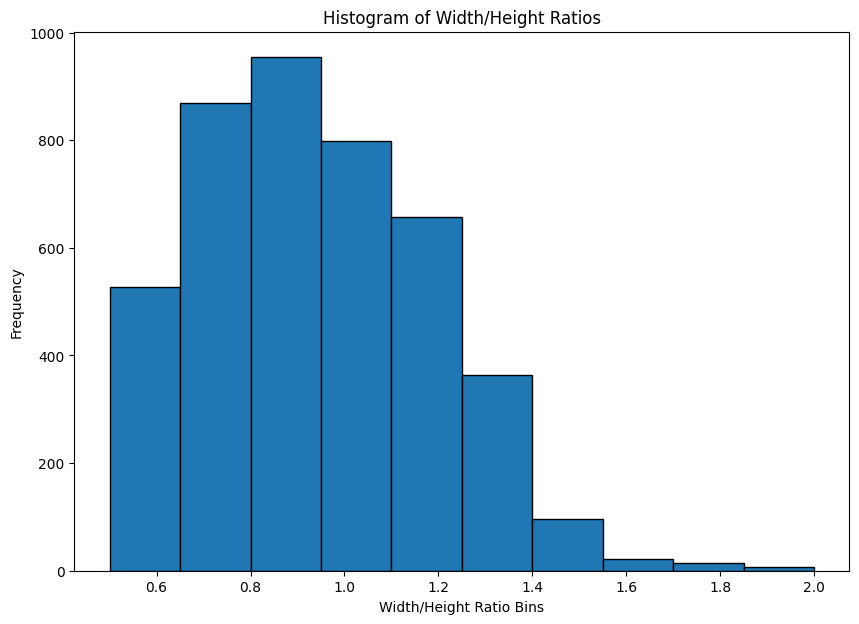

[527 869 954 799 658 363  97  22  14   7]


In [15]:
import numpy as np
import matplotlib.pyplot as plt


# Calculate widths and heights
widths = np.array([face.shape[0] for face in positive_exemples_face if face is not None])
heights = np.array([face.shape[1] for face in positive_exemples_face if face is not None])

# Calculate the ratio of widths to heights
ratios = widths / heights

# Create a histogram of the ratios in 20 bins
hist, bin_edges = np.histogram(ratios, bins=10, range=(0.5, 2))

# Plotting the histogram of ratios in 2D
plt.figure(figsize=(10, 7))
plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), edgecolor='black', align='edge')

# Adding labels and title
plt.xlabel('Width/Height Ratio Bins')
plt.ylabel('Frequency')
plt.title('Histogram of Width/Height Ratios')

# Show the plot
plt.show()

print(hist)

In [17]:
widths = np.array([face.shape[0] for face in positive_exemples_face if face is not None])
heights = np.array([face.shape[1] for face in positive_exemples_face if face is not None])

# Calculate the ratio of widths to heights
ratios = widths / heights
num_bins = 10  # Desired number of bins
bin_edges = np.quantile(ratios, q=np.linspace(0, 1, num_bins + 1))
print(bin_edges)
# Use `numpy.digitize` to assign each ratio to a bin
bin_indexes = np.digitize(ratios, bins=bin_edges, right=False)

# Create a dictionary to store the indexes for each bin
bin_to_indexes = {i: [] for i in range(1, len(bin_edges))}
for idx, bin_index in enumerate(bin_indexes):
    if 1 <= bin_index < len(bin_edges):  # Ensure valid bin index
        bin_to_indexes[bin_index].append(idx)

##### bins clasic
# # Get the indexes of each element in the ratios array corresponding to bins
# bin_indexes = np.digitize(ratios, bins=bin_edges, right=False)

# # Create a dictionary to store the indexes for each bin (1 to number of bins)
# bin_to_indexes = {i: [] for i in range(1, len(bin_edges))}

# # Populate the dictionary with indexes of elements
# for idx, bin_index in enumerate(bin_indexes):
#     if 1 <= bin_index <= len(bin_edges) - 1:  # Only consider valid bin indexes
#         bin_to_indexes[bin_index].append(idx)

# print(bin_edges)

# # Dictionary to store ratios for each bin
bin_ratios = {bin_id: [] for bin_id in bin_to_indexes.keys()}

# Populate the dictionary with ratios for each bin
for bin_id, indexes in bin_to_indexes.items():
    for i in indexes:
        # Access row
        
        # Calculate the ratio
        width = widths[i]
        height = heights[i]
        ratio = width / height
        
        # Add ratio to the bin
        bin_ratios[bin_id].append(ratio)

# Calculate the mean ratio for each bin
# Print the means for each bin
bin_median = {bin_id: round(np.median(ratios), 2) if len(ratios) > 0 else 0 for bin_id, ratios in bin_ratios.items()}

for bin_id, median in bin_median.items():
    print(f"Bin {bin_id}: Median Ratio = {median}")





[0.28318584 0.62009972 0.70491803 0.77654226 0.83976214 0.90909091
 0.99173554 1.07214845 1.1606261  1.27428843 5.11864407]
Bin 1: Median Ratio = 0.58
Bin 2: Median Ratio = 0.66
Bin 3: Median Ratio = 0.74
Bin 4: Median Ratio = 0.81
Bin 5: Median Ratio = 0.87
Bin 6: Median Ratio = 0.95
Bin 7: Median Ratio = 1.03
Bin 8: Median Ratio = 1.11
Bin 9: Median Ratio = 1.21
Bin 10: Median Ratio = 1.36


In [33]:
positive_examples_face = []
for index, row in positive_examples_face_csv.iterrows():
    positive_examples_face.append(cropped_image_of_row(row))
for i in range(len(positive_examples_face)):
    positive_examples_face[i] = cv2.resize(positive_examples_face[i], (36, 36), interpolation=cv2.INTER_AREA)


In [3]:
########## padding

positive_examples_face = []
for index, row in positive_examples_face_csv.iterrows():
    positive_examples_face.append(cropped_image_of_row(row))


In [4]:
def add_padding(image):
    height, width = image.shape[:2]
    square_size = max(height, width)
    new_image = np.zeros((square_size, square_size, 3), dtype=image.dtype)
    
    y_offset = (square_size - height) // 2
    x_offset = (square_size - width) // 2
    
    new_image[y_offset:y_offset + height, x_offset:x_offset + width] = image
    new_image = cv.resize(new_image,(window_size,window_size))
    return new_image



In [6]:
for i in range(len(positive_examples_face)):
    positive_examples_face[i]= add_padding(positive_examples_face[i])
    positive_examples_face[i] = cv2.resize(positive_examples_face[i], (36, 36), interpolation=cv2.INTER_AREA)


In [25]:
negative_examples_face = extract_negative_examples_face(110,110, 1000)
for i in range(len(negative_examples_face)):
    negative_examples_face[i]= cv.resize(negative_examples_face[i],(36,36))


mom_annotations.txt
dad_annotations.txt
dexter_annotations.txt
deedee_annotations.txt


In [34]:
output_dir = os.path.join("..","data","exemplePozitive")
os.makedirs(output_dir, exist_ok=True)

for e in range(len(positive_examples_face)):
    cv.imwrite(os.path.join(output_dir,f"{e}.jpg"),positive_examples_face[e])

output_dir = os.path.join("..","data","exempleNegative")
os.makedirs(output_dir, exist_ok=True)

for e in range(len(negative_examples_face)):
    cv.imwrite(os.path.join(output_dir,f"{e}.jpg"),negative_examples_face[e])

In [2]:
import numpy as np

# Create a linspace between 0.1 and 1 inclusive with a specified number of points
num_points = 15  # You can adjust the number of points
x_values = np.linspace(0.1, 1, num_points)

# Calculate log10(x) for each value of x
log10_values = np.log10(x_values)

# Display the results
for x, log_val in zip(x_values, log10_values):
    print(f"x: {x:.2f}, log10(x): {log_val:.5f}")


x: 0.10, log10(x): -1.00000
x: 0.16, log10(x): -0.78440
x: 0.23, log10(x): -0.64098
x: 0.29, log10(x): -0.53334
x: 0.36, log10(x): -0.44716
x: 0.42, log10(x): -0.37528
x: 0.49, log10(x): -0.31362
x: 0.55, log10(x): -0.25964
x: 0.61, log10(x): -0.21163
x: 0.68, log10(x): -0.16840
x: 0.74, log10(x): -0.12909
x: 0.81, log10(x): -0.09305
x: 0.87, log10(x): -0.05977
x: 0.94, log10(x): -0.02886
x: 1.00, log10(x): 0.00000


In [ ]:
import numpy as np

# Original image dimensions
original_size = 36
original_area = original_size ** 2

# Target ratios
ratios = [0.76, 0.93, 1.08, 1.28, 1.6]

# Calculate new sizes
for r in ratios:
    new_width = int(np.sqrt(r * original_area))
    new_height = int(np.sqrt(original_area / r))
    print(f"Ratio: {r:.2f}, New Width: {new_width}, New Height: {new_height}")

widths_heights = [[31, 41], [34, 37], [37, 34], [40, 31], [45, 28]]

In [14]:
import os

path = os.path.join("..", "evaluare", "fisiere_solutie", "331_Alexe_Bogdan", "task1","scores_all_faces.npy")

data = np.load(path)
print(data)



[ 4.06022995e+00  3.93479714e+00  3.54587774e+00  2.82948775e+00
  2.80936560e+00  1.78498655e+00  7.61266659e-01  5.89875083e-01
  4.06664867e-01  5.57938192e-02 -4.06381557e-01 -6.76754204e-01
 -8.63102900e-01 -9.24203539e-01 -9.44170812e-01 -9.56900743e-01
 -1.19258581e+00 -1.22820999e+00 -1.36485920e+00 -1.37797871e+00
 -1.74327514e+00 -1.89447281e+00 -1.91722116e+00 -2.07276156e+00
 -2.20986546e+00 -2.26243197e+00 -2.90347023e+00 -3.81920745e+00
 -4.16003799e+00 -4.42209848e+00 -4.84394958e+00 -5.05001802e+00
 -5.07117901e+00 -5.33466677e+00 -5.80356285e+00 -6.18899455e+00
 -6.60952001e+00  3.80049142e+00  3.17793692e+00  2.90162821e+00
  2.84974715e+00  2.54197457e+00  2.40808158e+00  1.23749961e+00
  9.10559874e-01  8.73179144e-01  6.77322053e-01  6.71572667e-01
  6.16499304e-01  5.87343975e-01  5.78991386e-01  4.02717159e-01
  6.30490430e-02  1.96731313e-02 -1.03090088e-01 -1.75028998e-01
 -2.56492879e-01 -2.59512079e-01 -3.95657717e-01 -4.60744413e-01
 -4.76237389e-01 -5.08014